In [1]:
# Loading packages
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
mpl.rcParams['figure.dpi'] = 400 
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import f_classif
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import metrics 

In [2]:
# Installing required packages
#pip install imblearn

In [3]:
# Loading the dataset
df = pd.read_excel('default_of_credit_card_clients__version_1_21_19.xls')

In [4]:
#Viewing the dataset
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# Viewing the column headers of the dataset 
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
# Checking if all rows are unique and correspond to one customer each
# If all rows are unique, we will have 30000 entries but we have only 29687 entries, meaning there are duplicate 
# rows in the dataset
df['ID'].nunique()

29687

In [7]:
# Seeing the duplicate counts
id_count=df['ID'].value_counts()
id_count.head()

382b378c-6383    2
7e7a4087-4def    2
998fa9b2-b341    2
64fe3b96-7ed0    2
4e2380e6-a8cf    2
Name: ID, dtype: int64

In [8]:
# Checking how many unique and duplicate counts are present
id_count.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [9]:
# Creating a mask to identify duplicates
duplicate_mask = id_count == 2
duplicate_mask[:10]

382b378c-6383    True
7e7a4087-4def    True
998fa9b2-b341    True
64fe3b96-7ed0    True
4e2380e6-a8cf    True
9929aa3b-d8f6    True
ad63957b-ea9a    True
ac821a7b-b399    True
1d58344c-5793    True
27e04c06-487f    True
Name: ID, dtype: bool

In [10]:
# Storing the duplicate IDs in a list 
duplicate_ids=list(id_count.index[duplicate_mask])
print(len(duplicate_ids))

313


In [11]:
#Viewing some of the duplicate IDs in the dataframe
df.loc[df['ID'].isin(duplicate_ids[0:10]),:].head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2823,64fe3b96-7ed0,30000,2,3,1,57,-1,-1,-1,-1,...,135,68,193,1353,78,135,68,423,140,1
2923,64fe3b96-7ed0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3396,9929aa3b-d8f6,210000,2,1,2,43,Not available,-1,0,0,...,139784,142662,145725,184212,5482,3493,3590,3815,3876,0
3496,9929aa3b-d8f6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10666,382b378c-6383,100000,2,2,1,29,Not available,2,0,0,...,82320,83359,85837,0,5000,7000,2500,4000,0,0
10766,382b378c-6383,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15429,7e7a4087-4def,130000,1,2,1,24,0,0,2,0,...,47262,46226,390,5000,0,1925,0,0,780,0
15529,7e7a4087-4def,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17523,27e04c06-487f,200000,2,2,1,37,1,2,0,0,...,10155,12470,13571,0,2000,1155,2470,1265,0,0
17623,27e04c06-487f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Creating a boolean mask to remove the rows containing all 0s
df_boolean_mask = df == 0

In [13]:
# Feature mask is a boolean variable that assumes a True value if all the columns are simultaneiously 0 
# In other words, it is True when the record is a duplicate record

feature_zero_mask = df_boolean_mask.iloc[:,1:].all(axis=1)

In [14]:
# Checking whether the number of values represented as True in the Boolean mask actually corresponds to the 
# actual number of values that are duplicates in the dataframe
sum(feature_zero_mask)

315

In [15]:
#Retaining only those rows that do not have all zero entries
df_clean_1=df.loc[~feature_zero_mask,:].copy()

In [16]:
df_clean_1.shape

(29685, 25)

In [17]:
# Checking the number of unique records in the dataframe with duplicates removed
df_clean_1['ID'].nunique()

29685

In [18]:
#Checking the type of data in the columns of the dataframe with duplicates removed
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [19]:
# Checking the values in PAY_1 as the Dtype is displayed as 'object'
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [20]:
# Counting the number of valid PAY_1 values, i.e. values that are integral
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
sum(valid_pay_1_mask)

26664

In [21]:
#Removing those rows where PAY_1 information is not available
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [22]:
# Changing the type of the PAY_1 column to int64
df_clean_2['PAY_1']=df_clean_2['PAY_1'].astype('int64')

In [23]:
# Checking the summary of columns again
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

Performing Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_1'}>]], dtype=object)

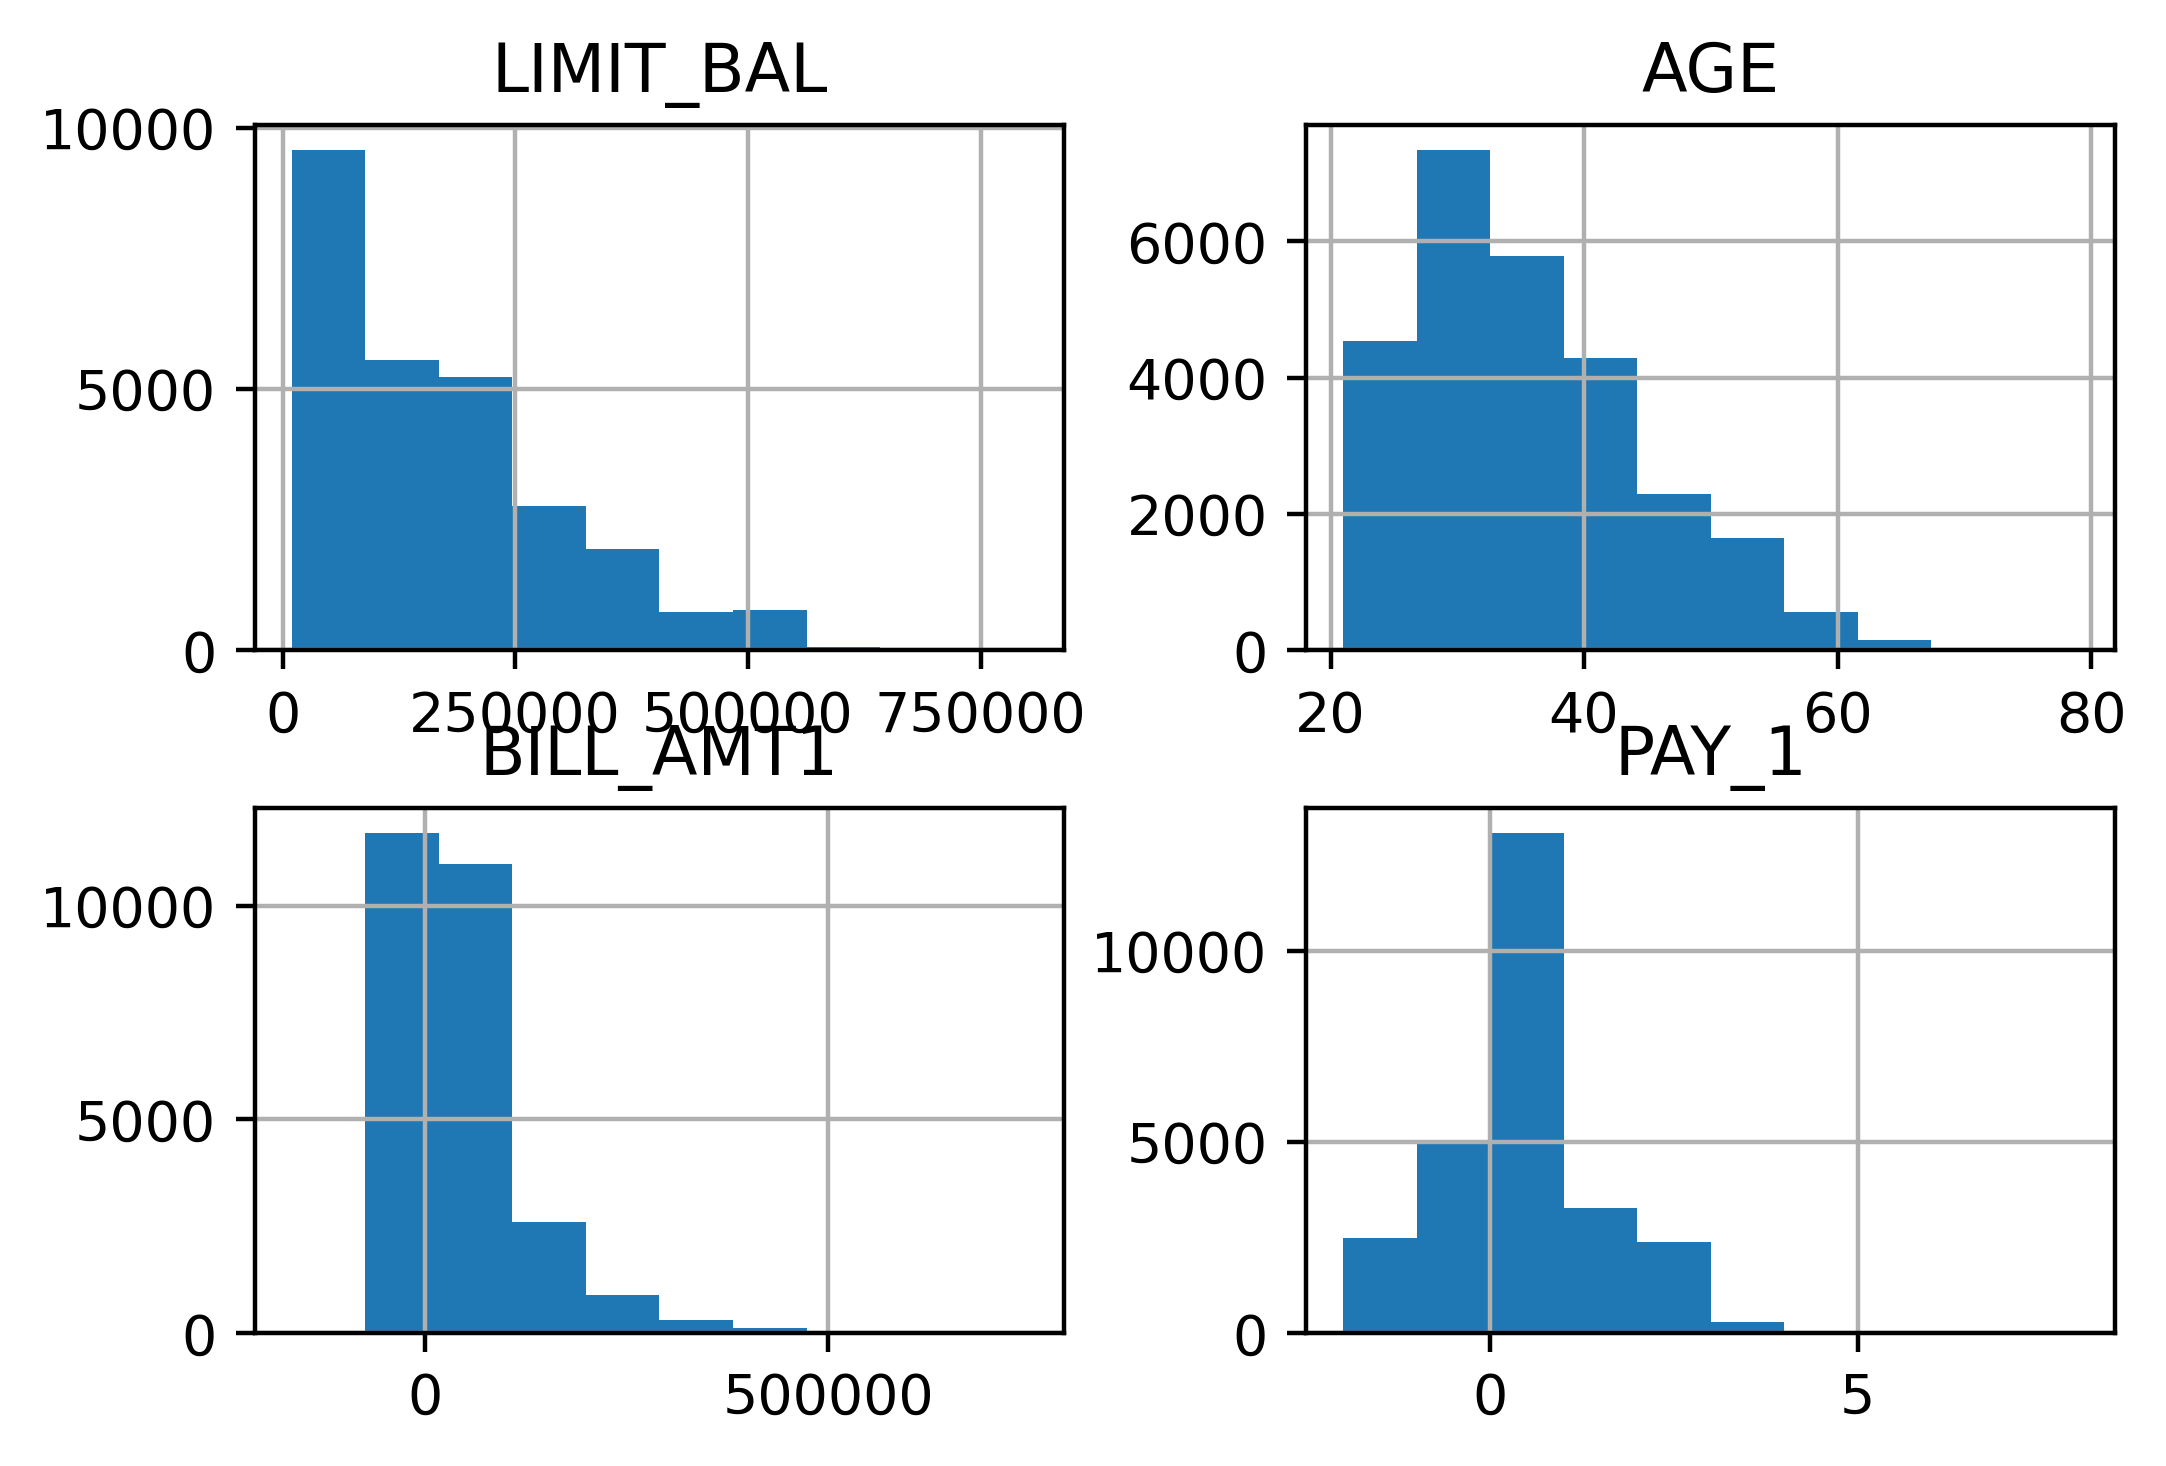

In [24]:
# Plotting histograms of a few variables

df_clean_2[['LIMIT_BAL','AGE','BILL_AMT1','PAY_1']].hist()

In [25]:
# Viewing the counts of different categories of the EDUCATION field

df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [26]:
# Replacing values 0,5 and 6 in education column to 4 (others) as 0,5,6 are not defined in the data dictionary 
# provided by the dataset providers
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6],value=4,inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [27]:
# Replacing value 0 in the marriage column to 3 (others) as 0 is not defined in the provided data dictionary
df_clean_2['MARRIAGE'].replace(to_replace=[0],value=3,inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [28]:
# Checking if there is any relationship between ordinal level of education and defaulting in payments
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'})

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Text(0.5, 0, 'Level of Education')

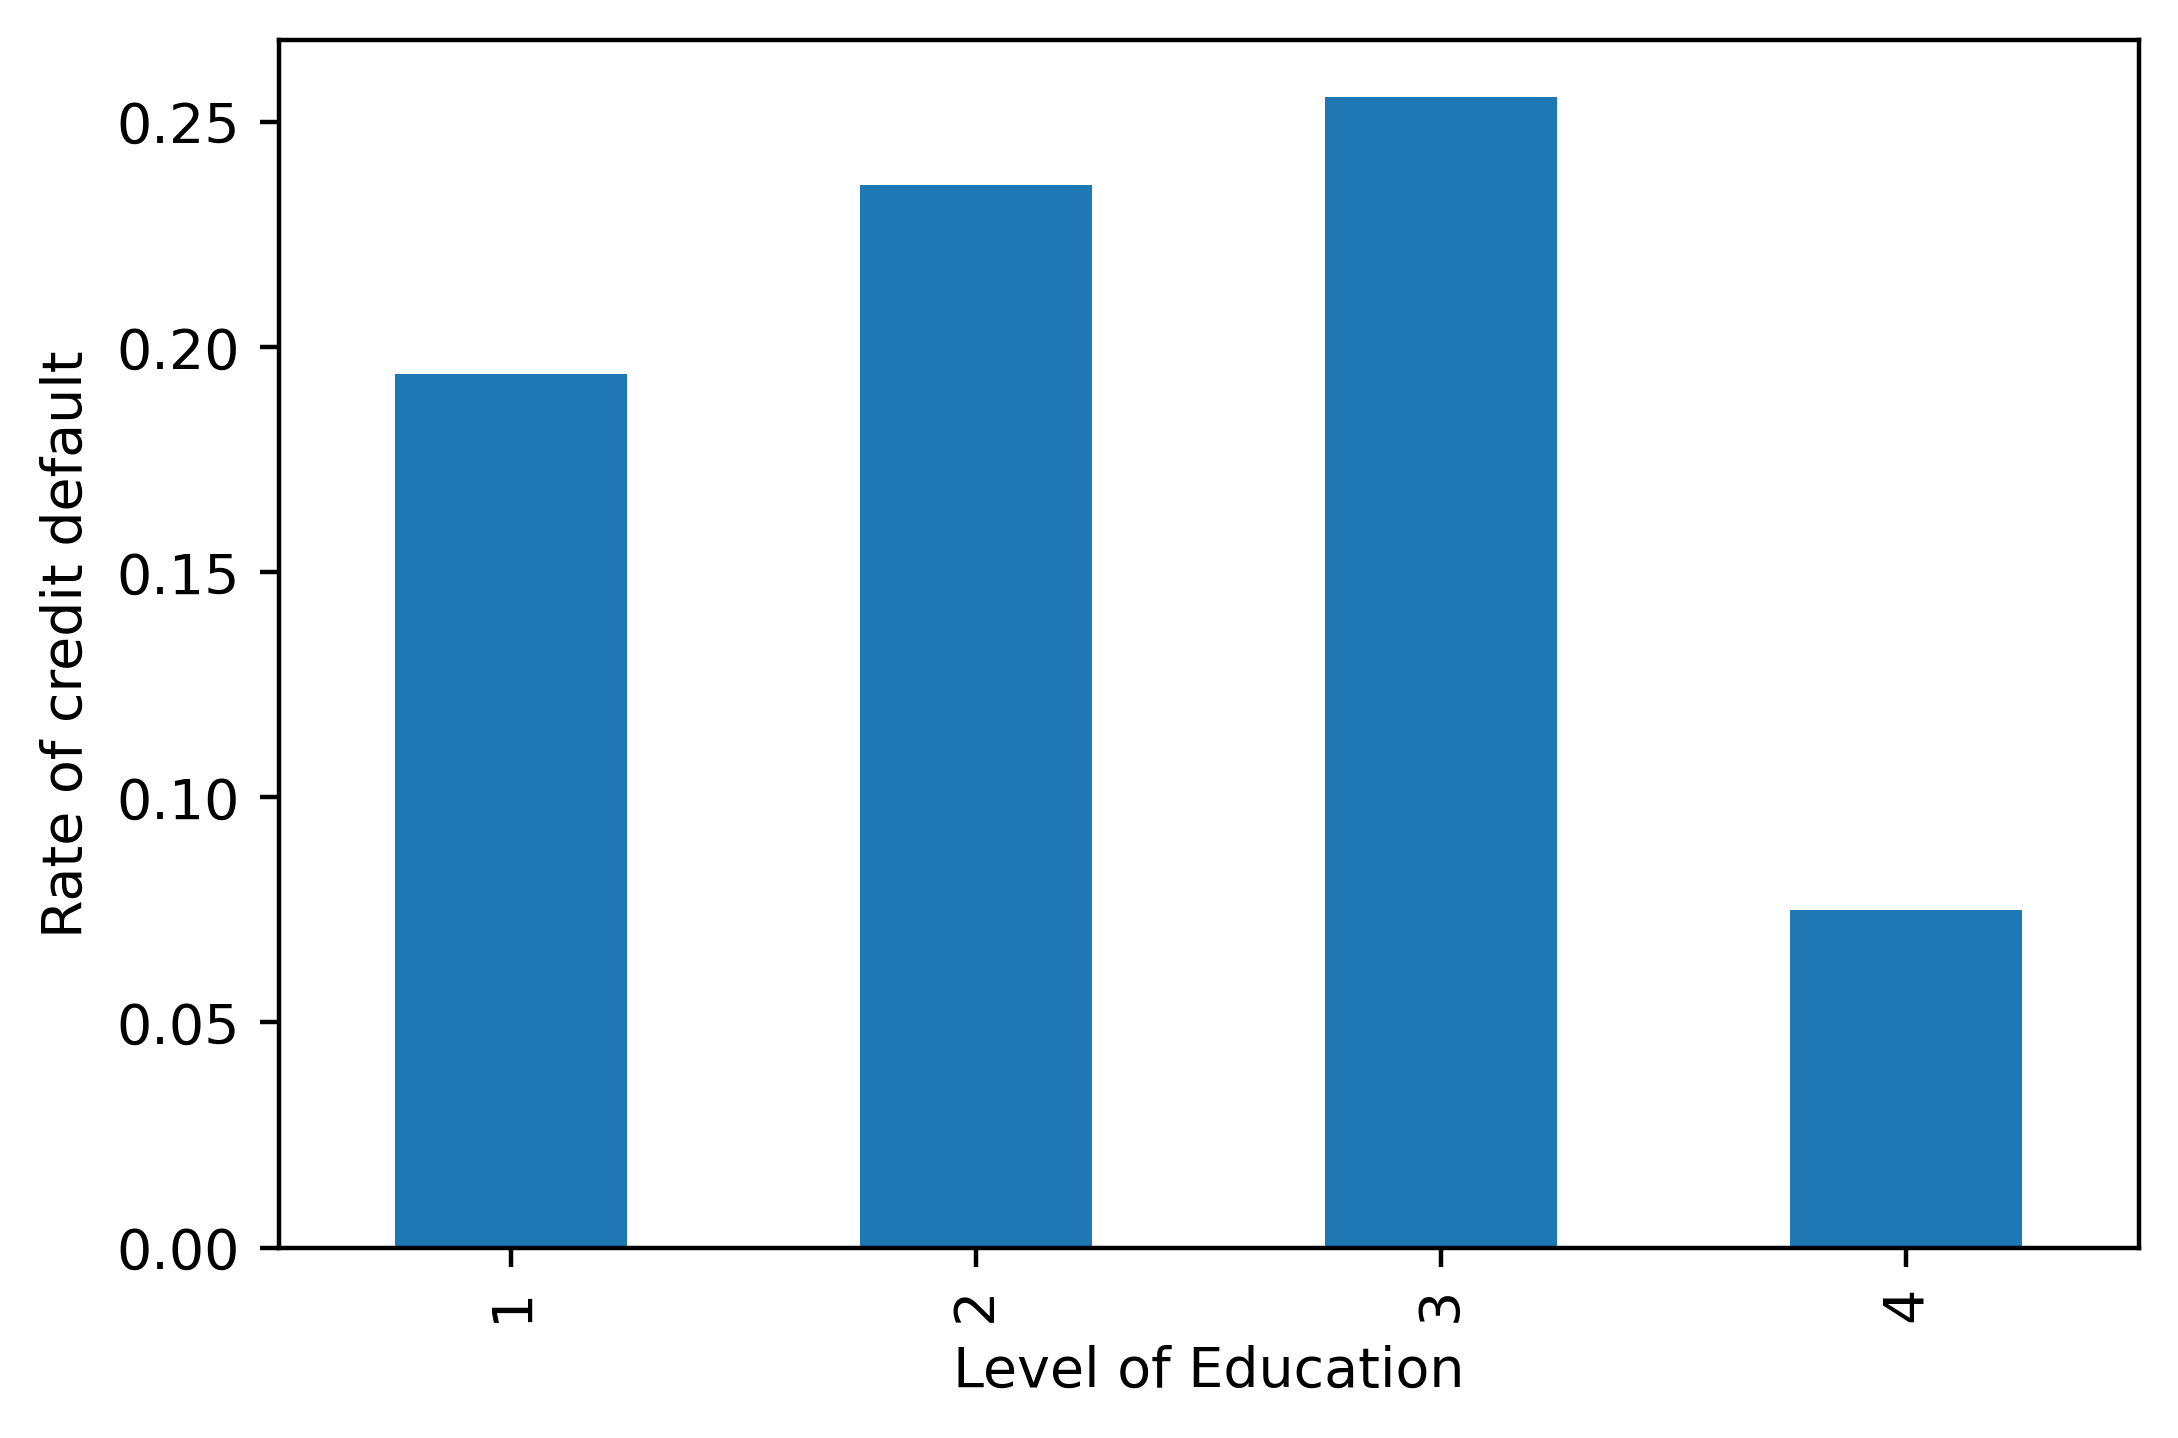

In [29]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Rate of credit default')
plt.xlabel('Level of Education')

# We observe that there is no linear relationship between the level of education and the rate of credit default

In [30]:
df_clean_2

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [31]:
#Writing the cleaned dataframe to a csv file 
df_clean_2.to_csv('cleaned_data.csv')

#Missing Value Imputation

In [32]:
df_orig = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')
# Creating dataframe of the original dataset dimensions with all 0s
df_zero_mask = df_orig == 0 
# Selecting those rows that have 0s in all columns starting from the second column
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
# Selecting rows that do not have all 0s using the feature_zero_mask filter
df_clean = df_orig.loc[~feature_zero_mask,:].copy()

In [33]:
#Creating a mask to isolate rows with missing PAY_1 values
pay_1_missing_values_mask = df_clean['PAY_1'] == 'Not available'
print(sum(pay_1_missing_values_mask))
#Creating a copy of rows that have missing values of Pay_1
df_pay_1_missing_values = df_clean.loc[pay_1_missing_values_mask,:].copy()

3021


In [34]:
#Loading the data without the missing values in PAY_1 field
df= pd.read_csv('cleaned_data.csv')

In [35]:
df.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [36]:
#Creating a list that contains the column names (features and the response)
features_response = df.columns.tolist()

#Removing columns that are not considered as features for modelling purposes
items_to_remove = ['Unnamed: 0','ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

# Removing elements in the items_to_remove from the all_features list
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [37]:
# Mode based and random imputation OF PAY_1 variable
X_train,X_test,y_train,y_test = \
train_test_split(df[features_response[:-1]].values,df['default payment next month'].values,
                 test_size=0.2,random_state=10)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 17)
(5333, 17)
(21331,)
(5333,)


In [39]:
# Finding the median value of PAY_1 for rows where the value is present
np.median(X_train[:,4])

0.0

In [40]:
np.random.seed(seed=5)
fill_values = [0, np.random.choice(X_train[:,4], size=(3021,), replace=True)]
#Names of imputation strategies
fill_method = ['mode','random']

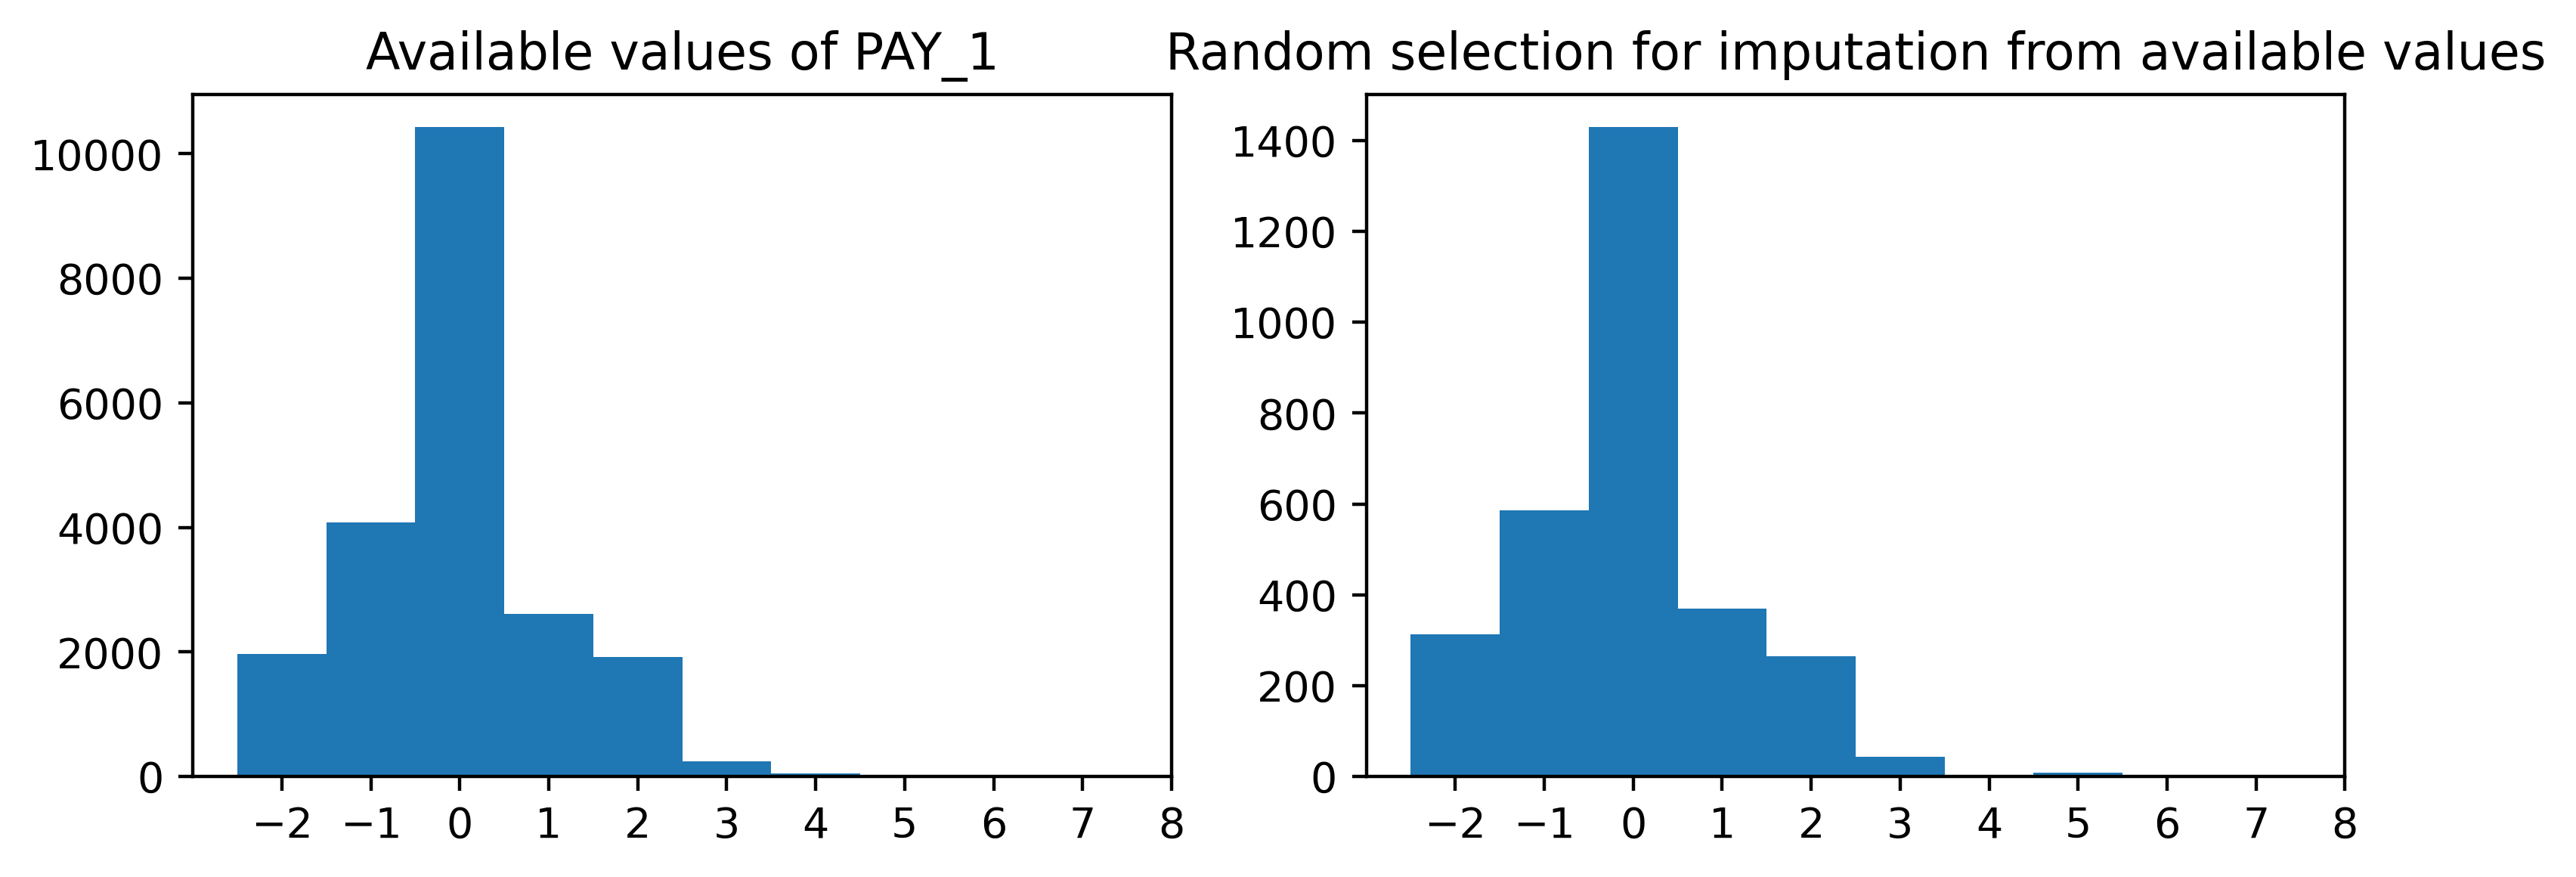

In [41]:
#Confirming whether the imputed values generated from the random number generator have the same distribution
# as that of the distribution from which they were sampled - It is evident that the two distributions are 
# quite similar to each other

fig, axs = plt.subplots(1,2, figsize=(8,3))
bin_edges = np.arange(-2,9)
axs[0].hist(X_train[:,4],bins=bin_edges,align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Available values of PAY_1')
axs[1].hist(fill_values[-1],bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Random selection for imputation from available values')
plt.tight_layout()

In [42]:
# Applying cross-validation for comparing imputation methods


k_folds = KFold(n_splits=4,shuffle=True,random_state=1)

# Instantiating the random forest classifier
rf = RandomForestClassifier\
(n_estimators=200, criterion='gini', max_depth=9,
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, n_jobs=None,
random_state=4, verbose=1, warm_start=False, class_weight=None)

for counter in range(len(fill_values)):
    #Copying the data frame with missing PAY_1 and assigning imputed values
    df_fill_pay_1_filled = df_pay_1_missing_values.copy()
    df_fill_pay_1_filled['PAY_1'] = fill_values[counter]
    
    #Splitting imputed data into training and testing, using the same
    #80/20 split used for the data with non-missing PAY_1
    X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
    train_test_split(
        df_fill_pay_1_filled[features_response[:-1]].values,
        df_fill_pay_1_filled['default payment next month'].values,
    test_size=0.2, random_state=24)
    
    #Concatenating the imputed data with the array of non-missing data
    X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
    y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
    
    #Using the KFolds splitter and the random forest model to get
    #4-fold cross-validation scores for both imputation methods
    imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True,
                                       error_score='raise')
    
    test_score = imputation_compare_cv['test_score']
    print(fill_method[counter] + ' imputation: ' +
          'mean testing score ' + str(np.mean(test_score)) +
          ', std ' + str(np.std(test_score)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    6.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.


mode imputation: mean testing score 0.771516097280651, std 0.003028961941034701


[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.7s finished


random imputation: mean testing score 0.7695550786532277, std 0.004004906285759158


In [43]:
# Predictive Model for PAY_1 imputation

# Creating a copy of the dataframe with no missing values of PAY_1
pay_1_df = df.copy()

In [44]:
pay_1_df

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,798fc410-45c1,20000,2,2,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,85698822-43f5,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,0737c11b-be42,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
26660,29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
26661,29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
26662,29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [45]:
#Creating the list of features to be used for building the imputation predictive model
features_for_imputation = pay_1_df.columns.tolist()
items_to_remove_2 = ['Unnamed: 0','ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                     'default payment next month', 'PAY_1']
features_for_imputation = [item for item in features_for_imputation if item not in items_to_remove_2]

In [46]:
features_for_imputation

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [47]:
# Splitting the data into training and test sets

X_impute_train,X_impute_test,y_impute_train,y_impute_test = \
train_test_split (
    pay_1_df[features_for_imputation].values, pay_1_df['PAY_1'].values,
    test_size = 0.2 , random_state = 10)

In [48]:
# Selecting a grid of hyperparameters to search using cross-validation

rf_impute_params = {'max_depth':[3, 6, 9, 12],
             'n_estimators':[10, 50, 100, 200]}

In [49]:
# Importing and instantiating GridsearchCV

cv_rf_impute = GridSearchCV(rf, param_grid=rf_impute_params, scoring='accuracy', n_jobs=-1, 
                            refit=True, cv=4, verbose=2, error_score=np.nan, return_train_score=True)

In [50]:
# Running the GridSearch
cv_rf_impute.fit(X_impute_train,y_impute_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.1s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=9, max_features='auto',
                                              n_estimators=200, random_state=4,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [51]:
# Checking the best parameters that GridSearch found
cv_rf_impute.best_params_

{'max_depth': 12, 'n_estimators': 200}

In [52]:
# Checking the highest accuracy obtained
cv_rf_impute.best_score_

0.7348926727509743

In [53]:
#Checking the distribution of imputed values
pay_1_value_counts = pay_1_df['PAY_1'].value_counts().sort_index()

In [54]:
pay_1_value_counts

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [55]:
# Checking the percentage distribution of imputed values
pay_1_value_counts/pay_1_value_counts.sum()

-2    0.092859
-1    0.189281
 0    0.490812
 1    0.122300
 2    0.089184
 3    0.010951
 4    0.002363
 5    0.000863
 6    0.000413
 7    0.000338
 8    0.000638
Name: PAY_1, dtype: float64

In [56]:
# Making predictions on the test set
y_impute_predict = cv_rf_impute.predict(X_impute_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


In [57]:
#Checking the accuracy of prediction of imputed values on the test set
metrics.accuracy_score(y_impute_test,y_impute_predict)

0.7380461278829927

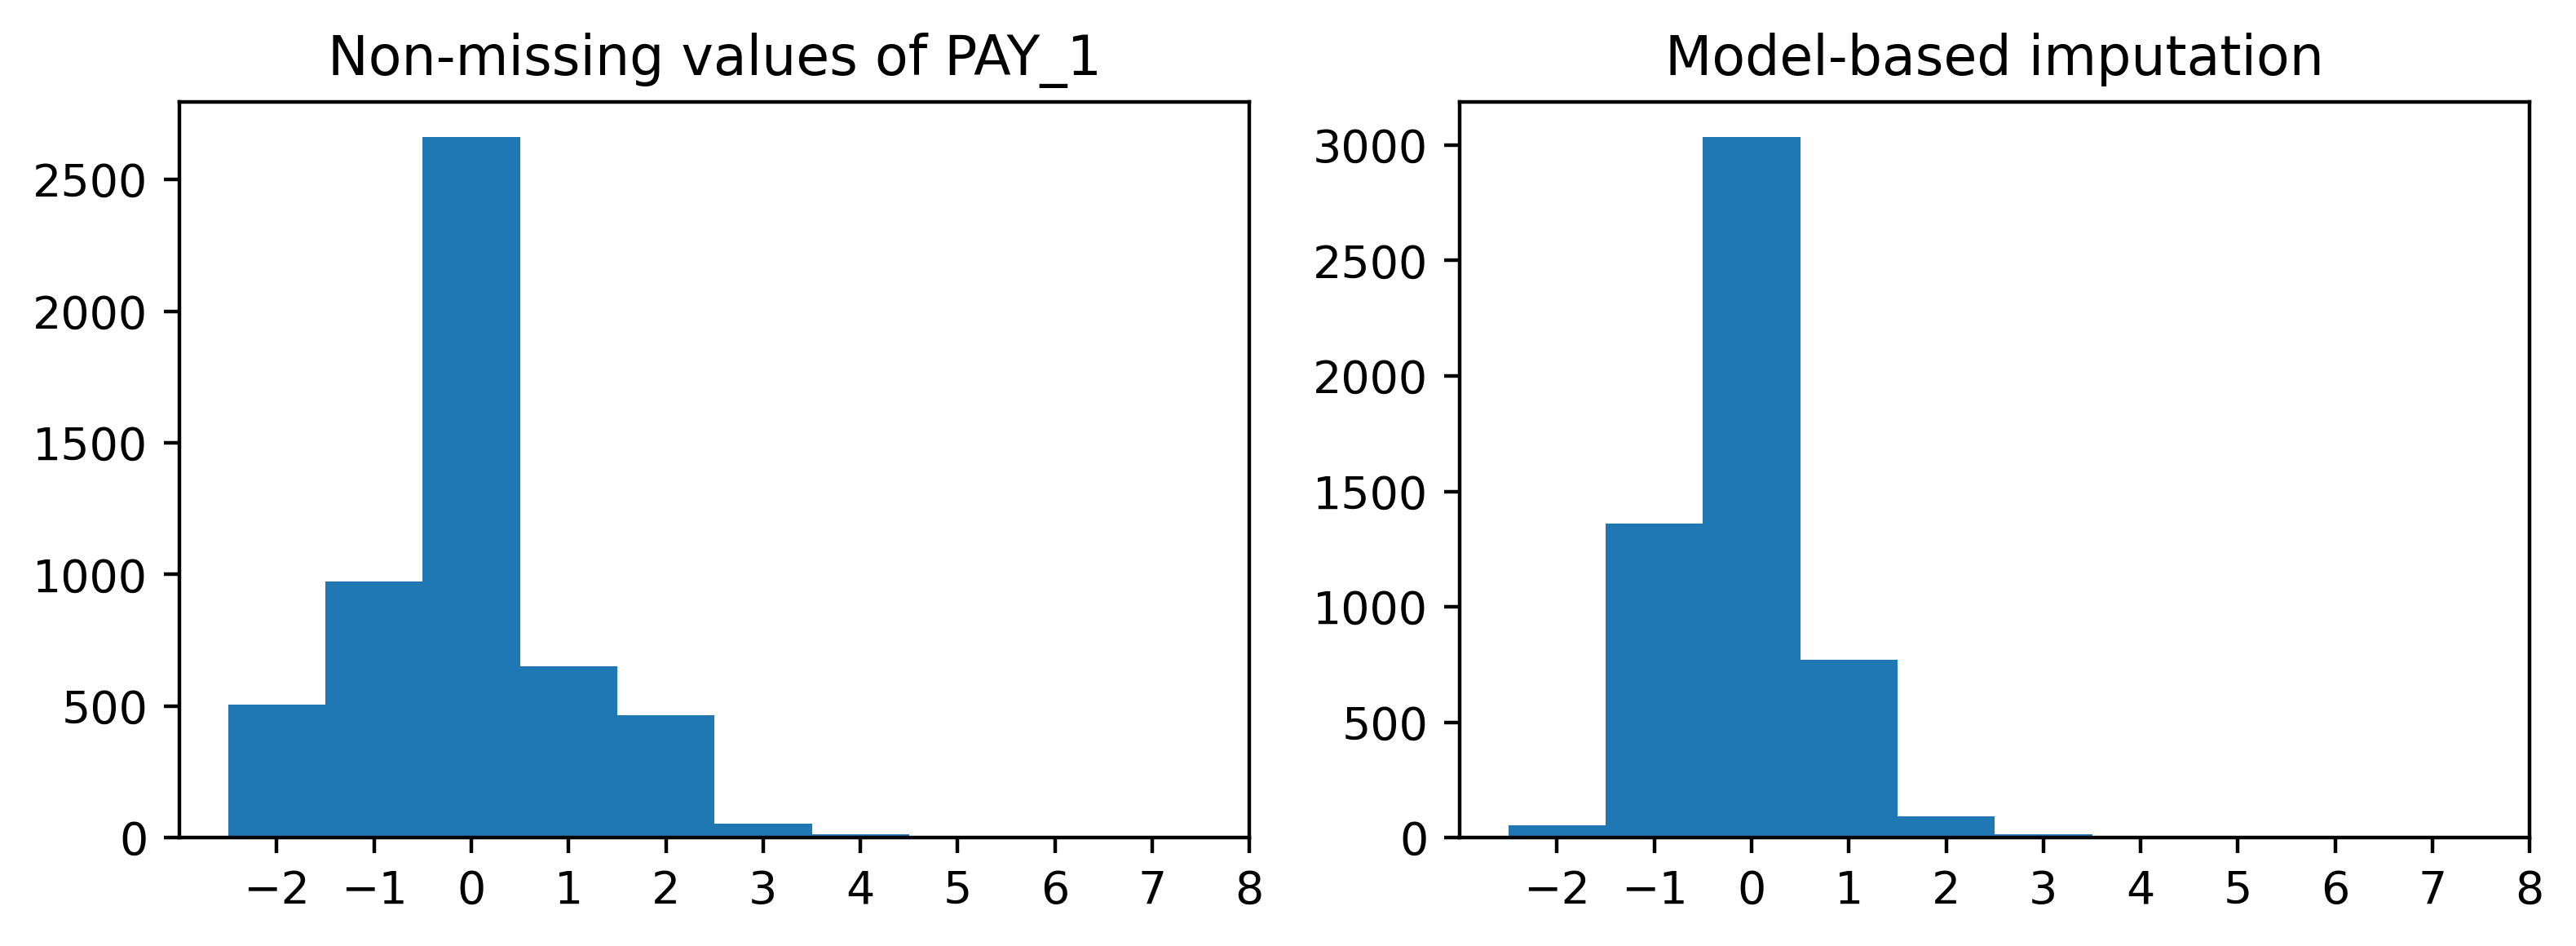

In [58]:
# Comparing the original distribution with the distributed of imputed values from model-based distribution 
fig, axs = plt.subplots(1,2, figsize=(8,3))
axs[0].hist(y_impute_test, bins=bin_edges, align='left')
axs[0].set_xticks(bin_edges)
axs[0].set_title('Non-missing values of PAY_1')
axs[1].hist(y_impute_predict, bins=bin_edges, align='left')
axs[1].set_xticks(bin_edges)
axs[1].set_title('Model-based imputation')
plt.tight_layout()

In [59]:
#Training the imputation model with all available data

X_impute_all = pay_1_df[features_for_imputation].values
y_impute_all = pay_1_df['PAY_1'].values

#Defining the RandomForestClassifier model with the optimal parameters obtained from GridSearchCV
rf_impute = RandomForestClassifier(n_estimators=200, max_depth=12) 

#Fitting the model

rf_impute.fit(X_impute_all,y_impute_all)

RandomForestClassifier(max_depth=12, n_estimators=200)

In [60]:
#Using the imputation model and comparing it with other methods
df_fill_pay_1_model = df_pay_1_missing_values.copy()

In [61]:
df_fill_pay_1_model['PAY_1'].head()

17    Not available
28    Not available
29    Not available
54    Not available
60    Not available
Name: PAY_1, dtype: object

In [62]:
#Predicting the missing values using the RF model
df_fill_pay_1_model['PAY_1'] = rf_impute.predict(df_fill_pay_1_model[features_for_imputation].values)

In [63]:
df_fill_pay_1_model['PAY_1'].head()

17    0
28   -1
29    0
54    0
60    0
Name: PAY_1, dtype: int64

In [64]:
df_fill_pay_1_model['PAY_1'].value_counts().sort_index()

-2      30
-1     767
 0    1720
 1     442
 2      52
 3       8
 6       1
 7       1
Name: PAY_1, dtype: int64

In [65]:
# Splitting the imputed data into training and test sets and using the training set to add to the training set 
# that already has PAY_1 information to check whether and by how much does this additional data improve model
# performance

X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
    test_size = 0.2, random_state=10)

In [66]:
X_train_all = np.concatenate((X_train,X_fill_pay_1_train),axis=0)
y_train_all = np.concatenate((y_train,y_fill_pay_1_train),axis=0)

In [67]:
print(X_train_all.shape)
print(y_train_all.shape)

(23747, 17)
(23747,)


In [68]:
rf

RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=200,
                       random_state=4, verbose=1)

In [69]:
imputation_compare_cv = cross_validate(rf, X_train_all, y_train_all, scoring='roc_auc',
                                       cv=k_folds, n_jobs=-1, verbose=1,
                                       return_train_score=True, return_estimator=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    5.7s finished


In [70]:
imputation_compare_cv['test_score']

array([0.77083771, 0.76828172, 0.77026965, 0.77402785])

In [71]:
np.mean(imputation_compare_cv['test_score'])

0.7708542329427982

In [72]:
X_fill_pay_1_train, X_fill_pay_1_test, y_fill_pay_1_train, y_fill_pay_1_test = \
train_test_split(
    df_fill_pay_1_model[features_response[:-1]].values,
    df_fill_pay_1_model['default payment next month'].values,
test_size=0.2, random_state=10)

In [73]:
X_train_all = np.concatenate((X_train, X_fill_pay_1_train), axis=0)
X_test_all = np.concatenate((X_test, X_fill_pay_1_test), axis=0)
y_train_all = np.concatenate((y_train, y_fill_pay_1_train), axis=0)
y_test_all = np.concatenate((y_test, y_fill_pay_1_test), axis=0)

In [74]:
rf.fit(X_train_all, y_train_all)

/home/bharat/Desktop/CSE_773_Term_Paper/amod_gcn_rl/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.7s finished


RandomForestClassifier(max_depth=9, max_features='auto', n_estimators=200,
                       random_state=4, verbose=1)

In [75]:
y_test_all_predict_proba = rf.predict_proba(X_test_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [76]:
roc_auc_score(y_test_all, y_test_all_predict_proba[:,1])

0.7739602013607636

In [77]:
y_pred = rf.predict(X_test_all)
print(accuracy_score(y_test_all, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8174469518356349


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [86]:
print('Precision: %.3f' % precision_score(y_test_all, y_pred))
print('Recall: %.3f' % recall_score(y_test_all, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test_all, y_pred))
print('F1 Score: %.3f' % f1_score(y_test_all, y_pred))
print('ROC_AUC Score: %.3f' % roc_auc_score(y_test_all, rf.predict_proba(X_test_all)[:, 1]))

Precision: 0.664
Recall: 0.308
Accuracy: 0.817
F1 Score: 0.420
ROC_AUC Score: 0.774


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [78]:
# Saving the training and test data
y_train_all=y_train_all.reshape(23747,1)
training_data=np.concatenate((X_train_all,y_train_all),axis=1)
pd.DataFrame(training_data).to_csv("train_data.csv")
y_test_all=y_test_all.reshape(5938,1)
test_data=np.concatenate((X_test_all,y_test_all),axis=1)
pd.DataFrame(test_data).to_csv("test_data.csv")

#Exploratory Data Analysis

In [79]:
train_data=pd.read_csv('train_data.csv')
test_data=pd.read_csv('test_data.csv')
train_data.drop('Unnamed: 0',axis=1,inplace=True)
test_data.drop('Unnamed: 0',axis=1,inplace=True)
df_headers=['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']
train_data.set_axis(df_headers,axis=1,inplace=True)
test_data.set_axis(df_headers,axis=1,inplace=True)

In [80]:
train_data

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,2,2,48,-1,1309,2158,1787,860,896,1087,1000,1787,860,900,1087,3123,0
1,230000,2,1,45,2,221691,226696,223872,98219,100276,102263,10000,3600,0,3628,3643,3929,0
2,360000,1,1,47,2,2500,0,0,0,0,0,0,0,0,0,0,0,1
3,130000,2,2,25,0,39074,39767,38680,5654,1938,522,1766,1521,3100,0,10,0,0
4,40000,2,1,41,0,21960,21484,7145,2424,822,0,1176,1049,1000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23742,200000,3,1,42,-1,390,742,4352,390,780,390,742,4000,0,780,0,1757,0
23743,210000,1,2,46,-1,15655,3918,29881,24247,21664,1556,4854,30366,0,433,1556,14047,1
23744,260000,2,1,40,-1,148,359,397,208,790,2788,360,398,208,792,2788,3675,0
23745,400000,3,2,49,0,36560,0,0,0,1757,21667,0,0,0,1757,20000,10158,0


In [81]:
test_data

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,180000,2,1,42,-2,390,1260,598,2056,4300,1802,1260,598,2056,4300,1802,3691,0
1,440000,2,2,25,2,225416,220405,226731,231456,237707,243555,0,10000,10000,10000,10000,10000,1
2,130000,3,2,27,1,133019,133178,132355,131797,131457,132202,6000,6000,5000,5000,5000,5200,0
3,330000,2,1,37,-2,2148,0,3080,3119,0,7255,0,3080,3119,0,7255,9060,0
4,100000,2,2,26,0,80117,46939,17841,15317,12630,11750,2683,2500,3000,6000,2500,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,30000,3,1,46,-1,2572,8822,5786,2749,28241,26960,8848,5869,0,26965,1066,3196,0
5934,50000,2,2,23,0,47662,41023,42162,6765,19286,9558,2000,2102,255,3000,191,0,0
5935,300000,2,1,43,-1,1314,0,0,0,0,0,0,0,0,0,0,0,0
5936,70000,3,1,39,0,124493,125680,129498,131216,136744,133413,4800,5900,6000,9200,0,4859,0


In [82]:
#Exploring the response variable
train_data['default payment next month'].mean()

0.22251231734534888

In [83]:
test_data['default payment next month'].mean()

0.21522398113843044

In [87]:
train_data['default payment next month'].value_counts()

0    18463
1     5284
Name: default payment next month, dtype: int64

In [90]:
# Checking the correlation between the dataset features
features_response=train_data.columns
corr=train_data.corr()
corr

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,-0.227866,-0.106633,0.144014,-0.266409,0.288290,0.281779,0.284029,0.296102,0.297096,0.291283,0.189646,0.169964,0.207104,0.204269,0.212942,0.218664,-0.150368
EDUCATION,-0.227866,1.000000,-0.142308,0.183808,0.107301,0.017458,0.013757,0.009057,-0.005369,-0.010585,-0.010191,-0.037561,-0.030106,-0.043291,-0.039245,-0.042635,-0.040656,0.035737
MARRIAGE,-0.106633,-0.142308,1.000000,-0.410438,0.016308,-0.030604,-0.026311,-0.031381,-0.029059,-0.030211,-0.024250,-0.000308,-0.011715,-0.004036,-0.010172,0.001974,-0.010749,-0.032007
AGE,0.144014,0.183808,-0.410438,1.000000,-0.039596,0.061065,0.057843,0.056632,0.054716,0.053098,0.051153,0.026468,0.019322,0.028964,0.022441,0.021950,0.019605,0.015984
PAY_1,-0.266409,0.107301,0.016308,-0.039596,1.000000,0.185246,0.186440,0.176512,0.175519,0.177012,0.175344,-0.083730,-0.064994,-0.066488,-0.062490,-0.053325,-0.056771,0.318339
BILL_AMT1,0.288290,0.017458,-0.030604,0.061065,0.185246,1.000000,0.954001,0.893624,0.864086,0.834139,0.807485,0.136661,0.099997,0.160831,0.159529,0.171172,0.185436,-0.014590
BILL_AMT2,0.281779,0.013757,-0.026311,0.057843,0.186440,0.954001,1.000000,0.927689,0.896079,0.863335,0.835041,0.273784,0.102762,0.156802,0.149770,0.161929,0.181246,-0.009845
BILL_AMT3,0.284029,0.009057,-0.031381,0.056632,0.176512,0.893624,0.927689,1.000000,0.922702,0.883594,0.853575,0.233796,0.319538,0.133249,0.144939,0.183730,0.184701,-0.010299
BILL_AMT4,0.296102,-0.005369,-0.029059,0.054716,0.175519,0.864086,0.896079,0.922702,1.000000,0.941383,0.902006,0.230032,0.199971,0.305052,0.142266,0.157994,0.179016,-0.004564
BILL_AMT5,0.297096,-0.010585,-0.030211,0.053098,0.177012,0.834139,0.863335,0.883594,0.941383,1.000000,0.946876,0.212522,0.175156,0.256761,0.297187,0.141520,0.163611,-0.001580


<AxesSubplot:>

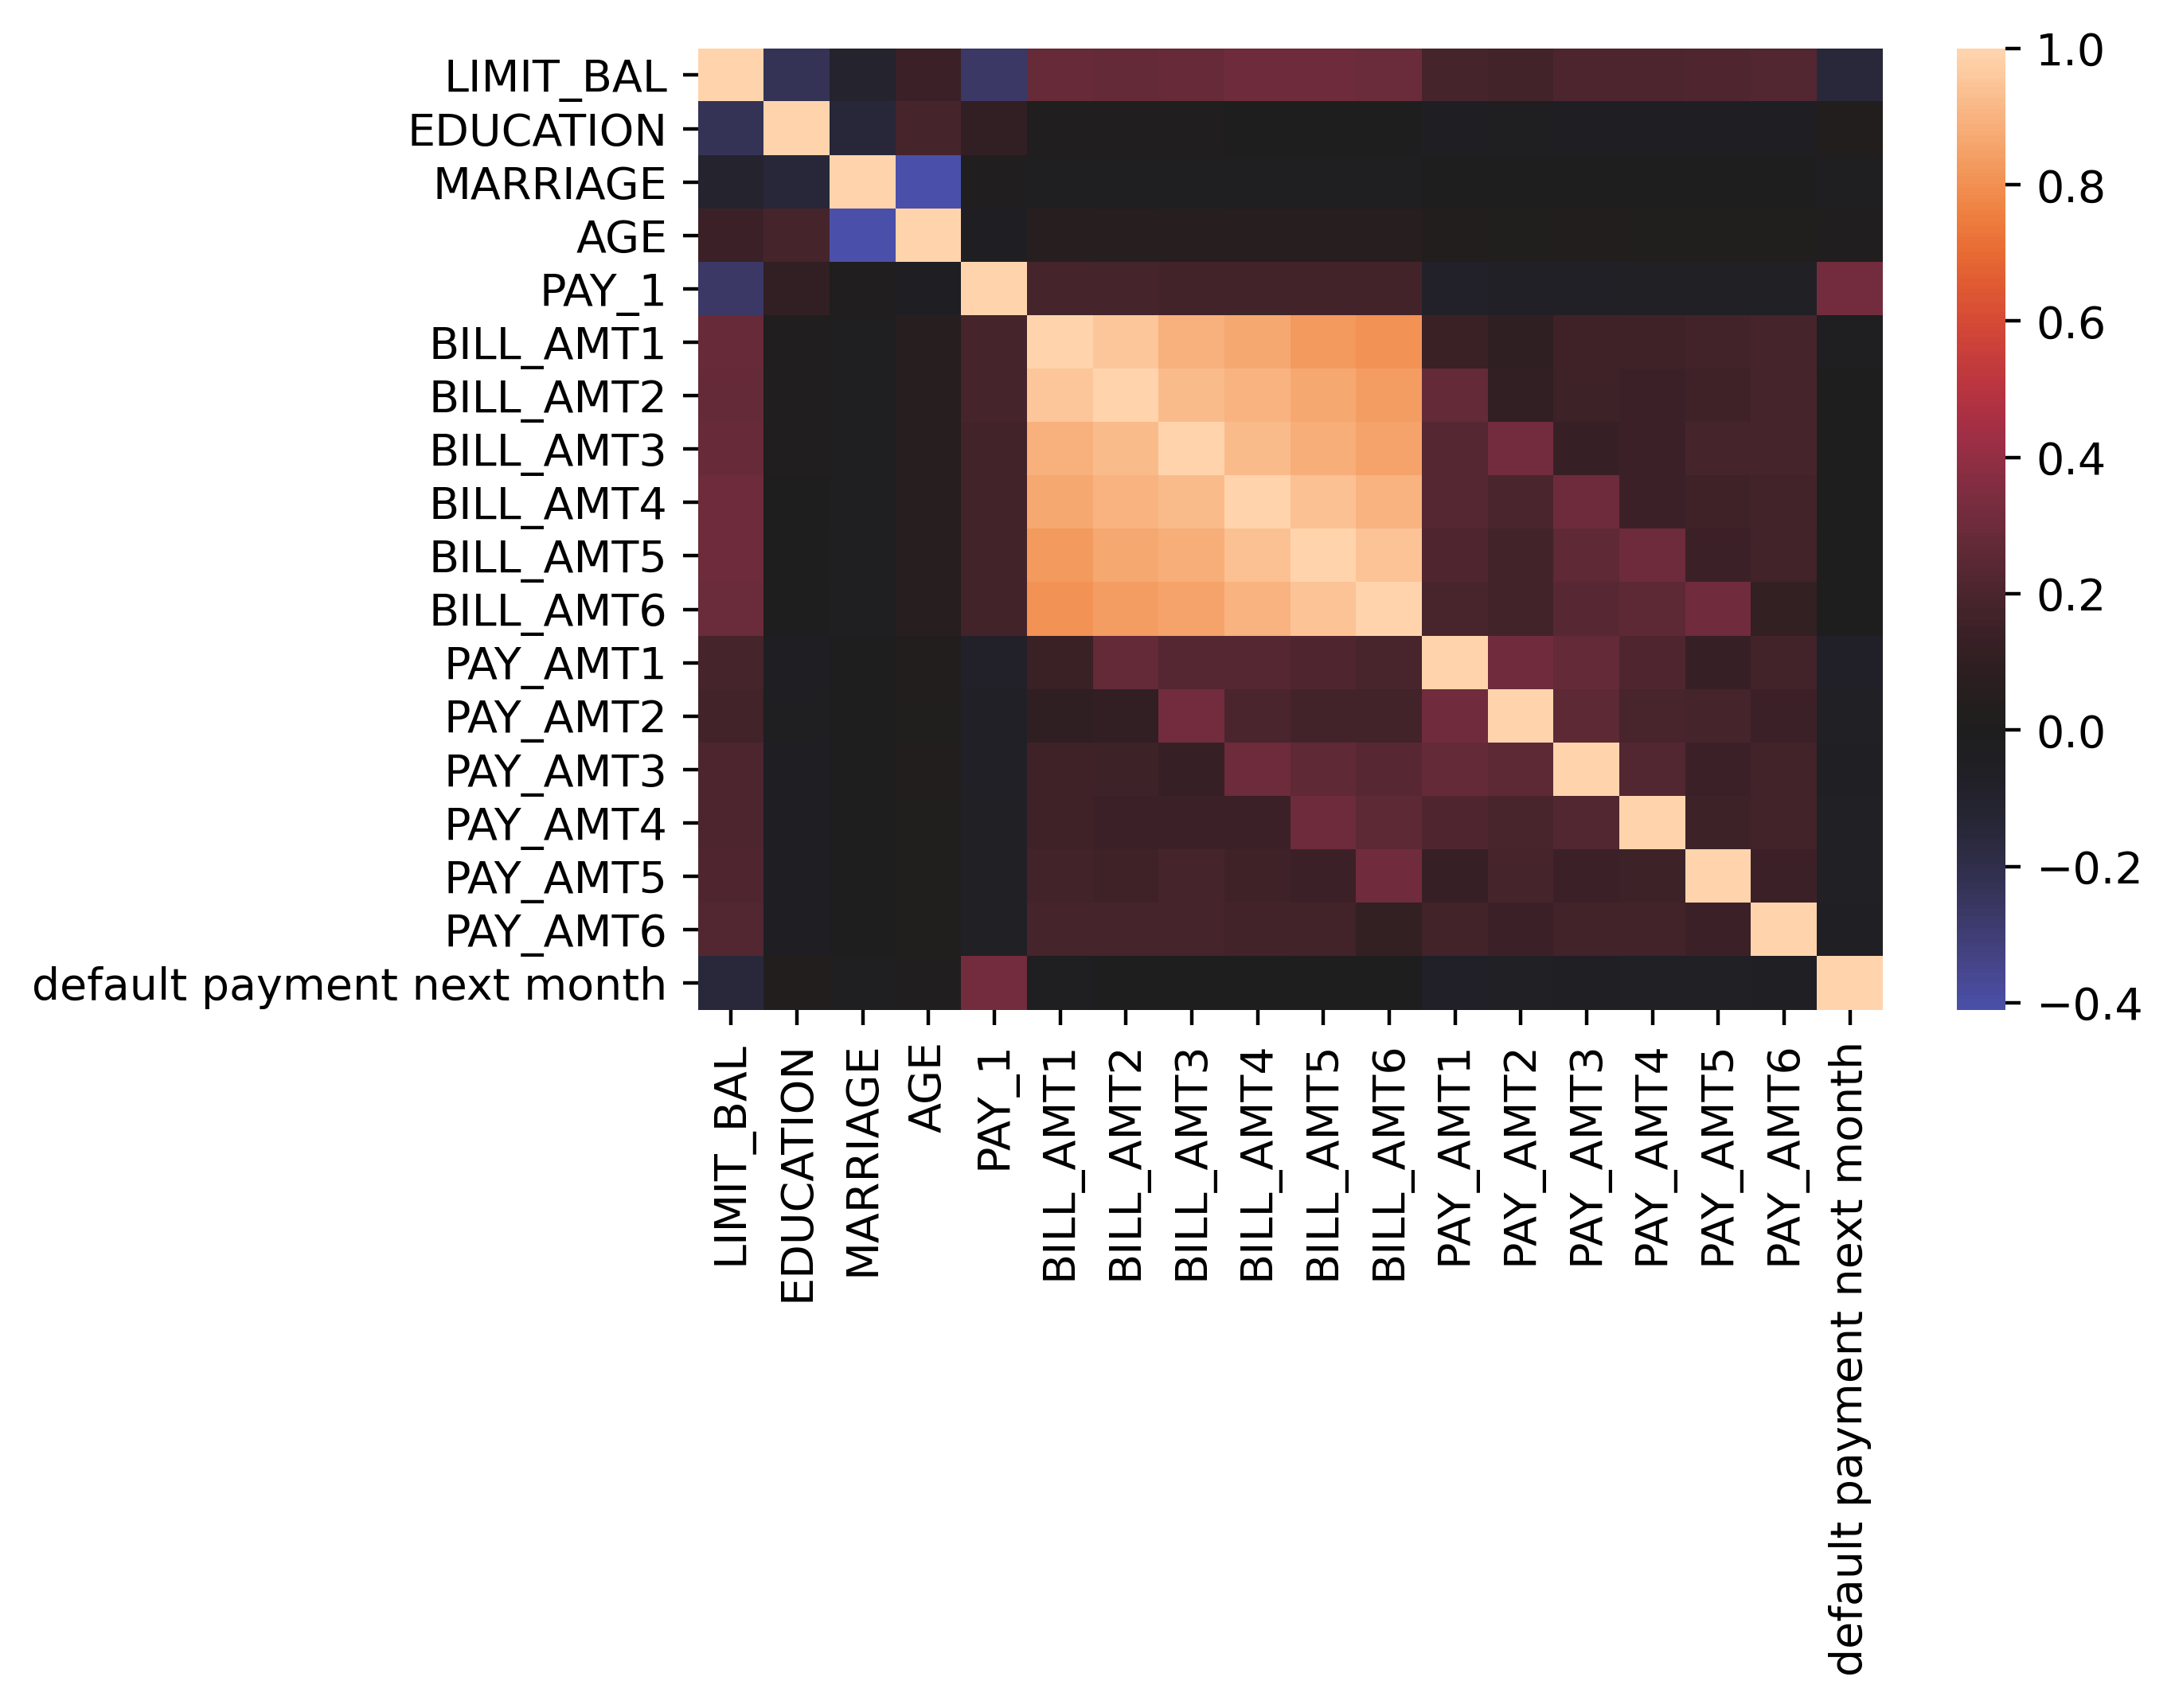

In [91]:
# Creating a heatmap of correlation analysis

mpl.rcParams['figure.dpi'] = 400
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,center=0)

In [92]:
x_train=train_data.loc[:,train_data.columns != 'default payment next month']
y_train=train_data['default payment next month']
x_test=test_data.loc[:,test_data.columns != 'default payment next month']
y_test=test_data['default payment next month']

In [95]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(23747, 17)
(23747,)
(5938, 17)
(5938,)


In [96]:
# Performing an ANOVA F Test for determining the F-Scores of Features
[f_stat,f_p_value] = f_classif(x_train,y_train)
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F Statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F Statistic,p value
4,PAY_1,2677.670671,0.000000e+00
0,LIMIT_BAL,549.304218,4.121699e-120
11,PAY_AMT1,127.634321,1.605312e-29
14,PAY_AMT4,79.422184,5.368520e-19
12,PAY_AMT2,73.745892,9.421884e-18
15,PAY_AMT5,68.257083,1.509267e-16
13,PAY_AMT3,64.520460,9.994214e-16
16,PAY_AMT6,61.402117,4.847397e-15
1,EDUCATION,30.364772,3.616874e-08
2,MARRIAGE,24.350064,8.086753e-07


In [97]:
# Visualizing relationships between the features and the response variable
overall_default_rate = train_data['default payment next month'].mean()
overall_default_rate
group_by_pay_mean_y = train_data.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.134201
-1,0.162870
0,0.137247
1,0.344340
2,0.695853
3,0.787755
4,0.693878
5,0.444444
6,0.545455


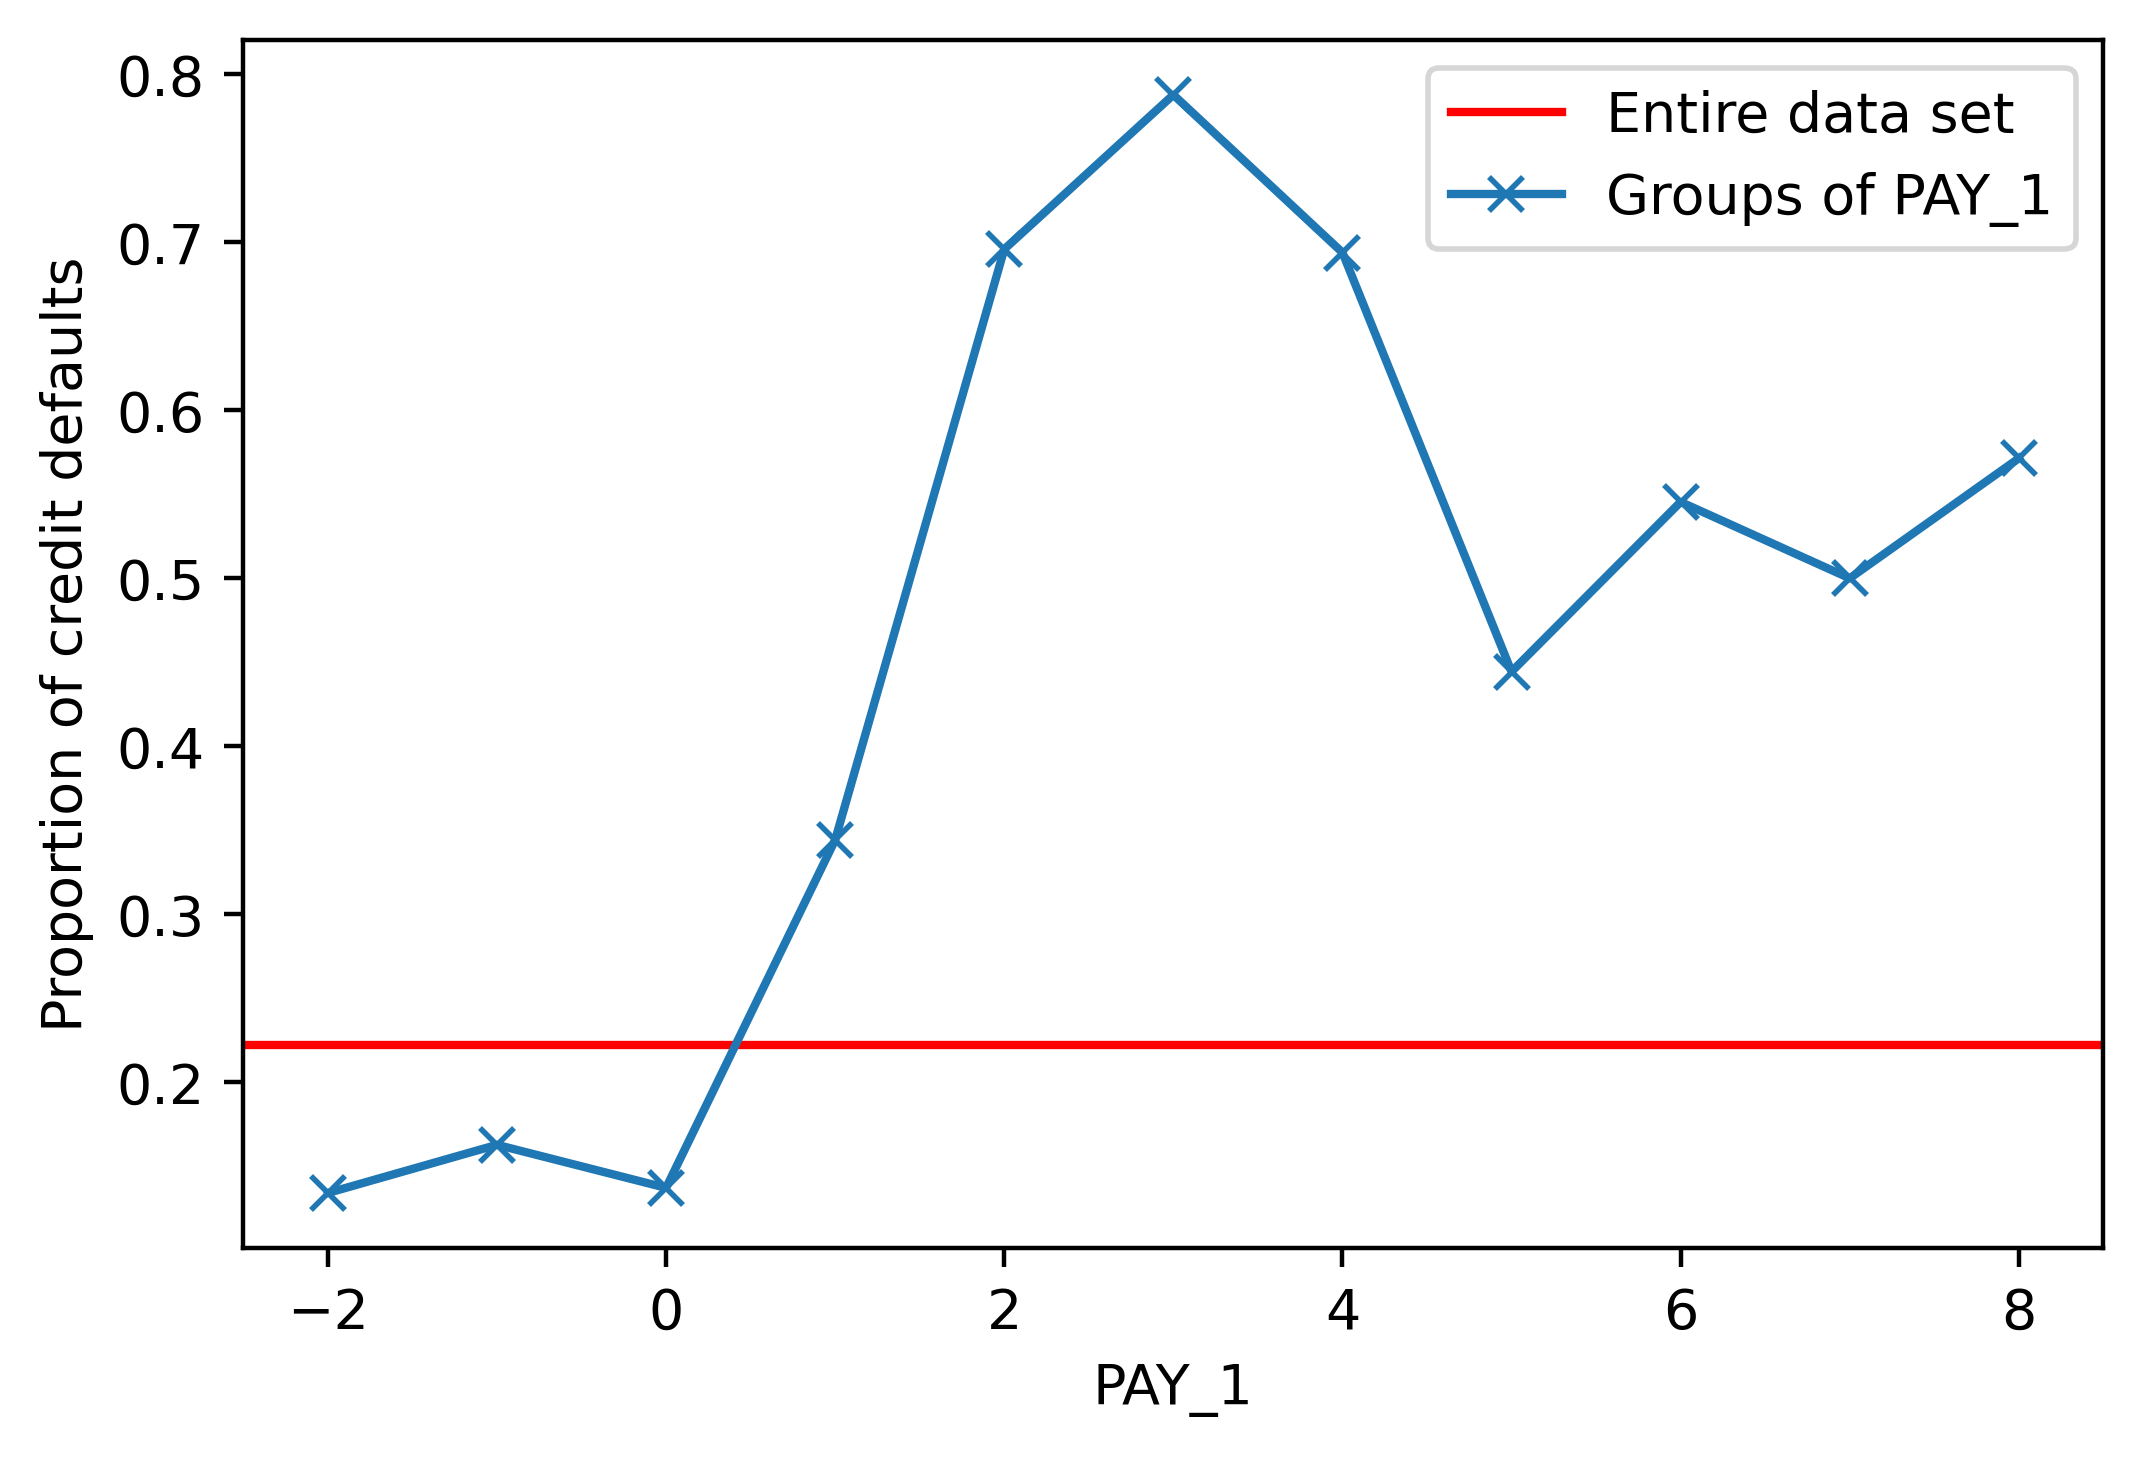

In [98]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire data set', 'Groups of PAY_1'])

Text(0.5, 1.0, 'Credit limits by response variable')

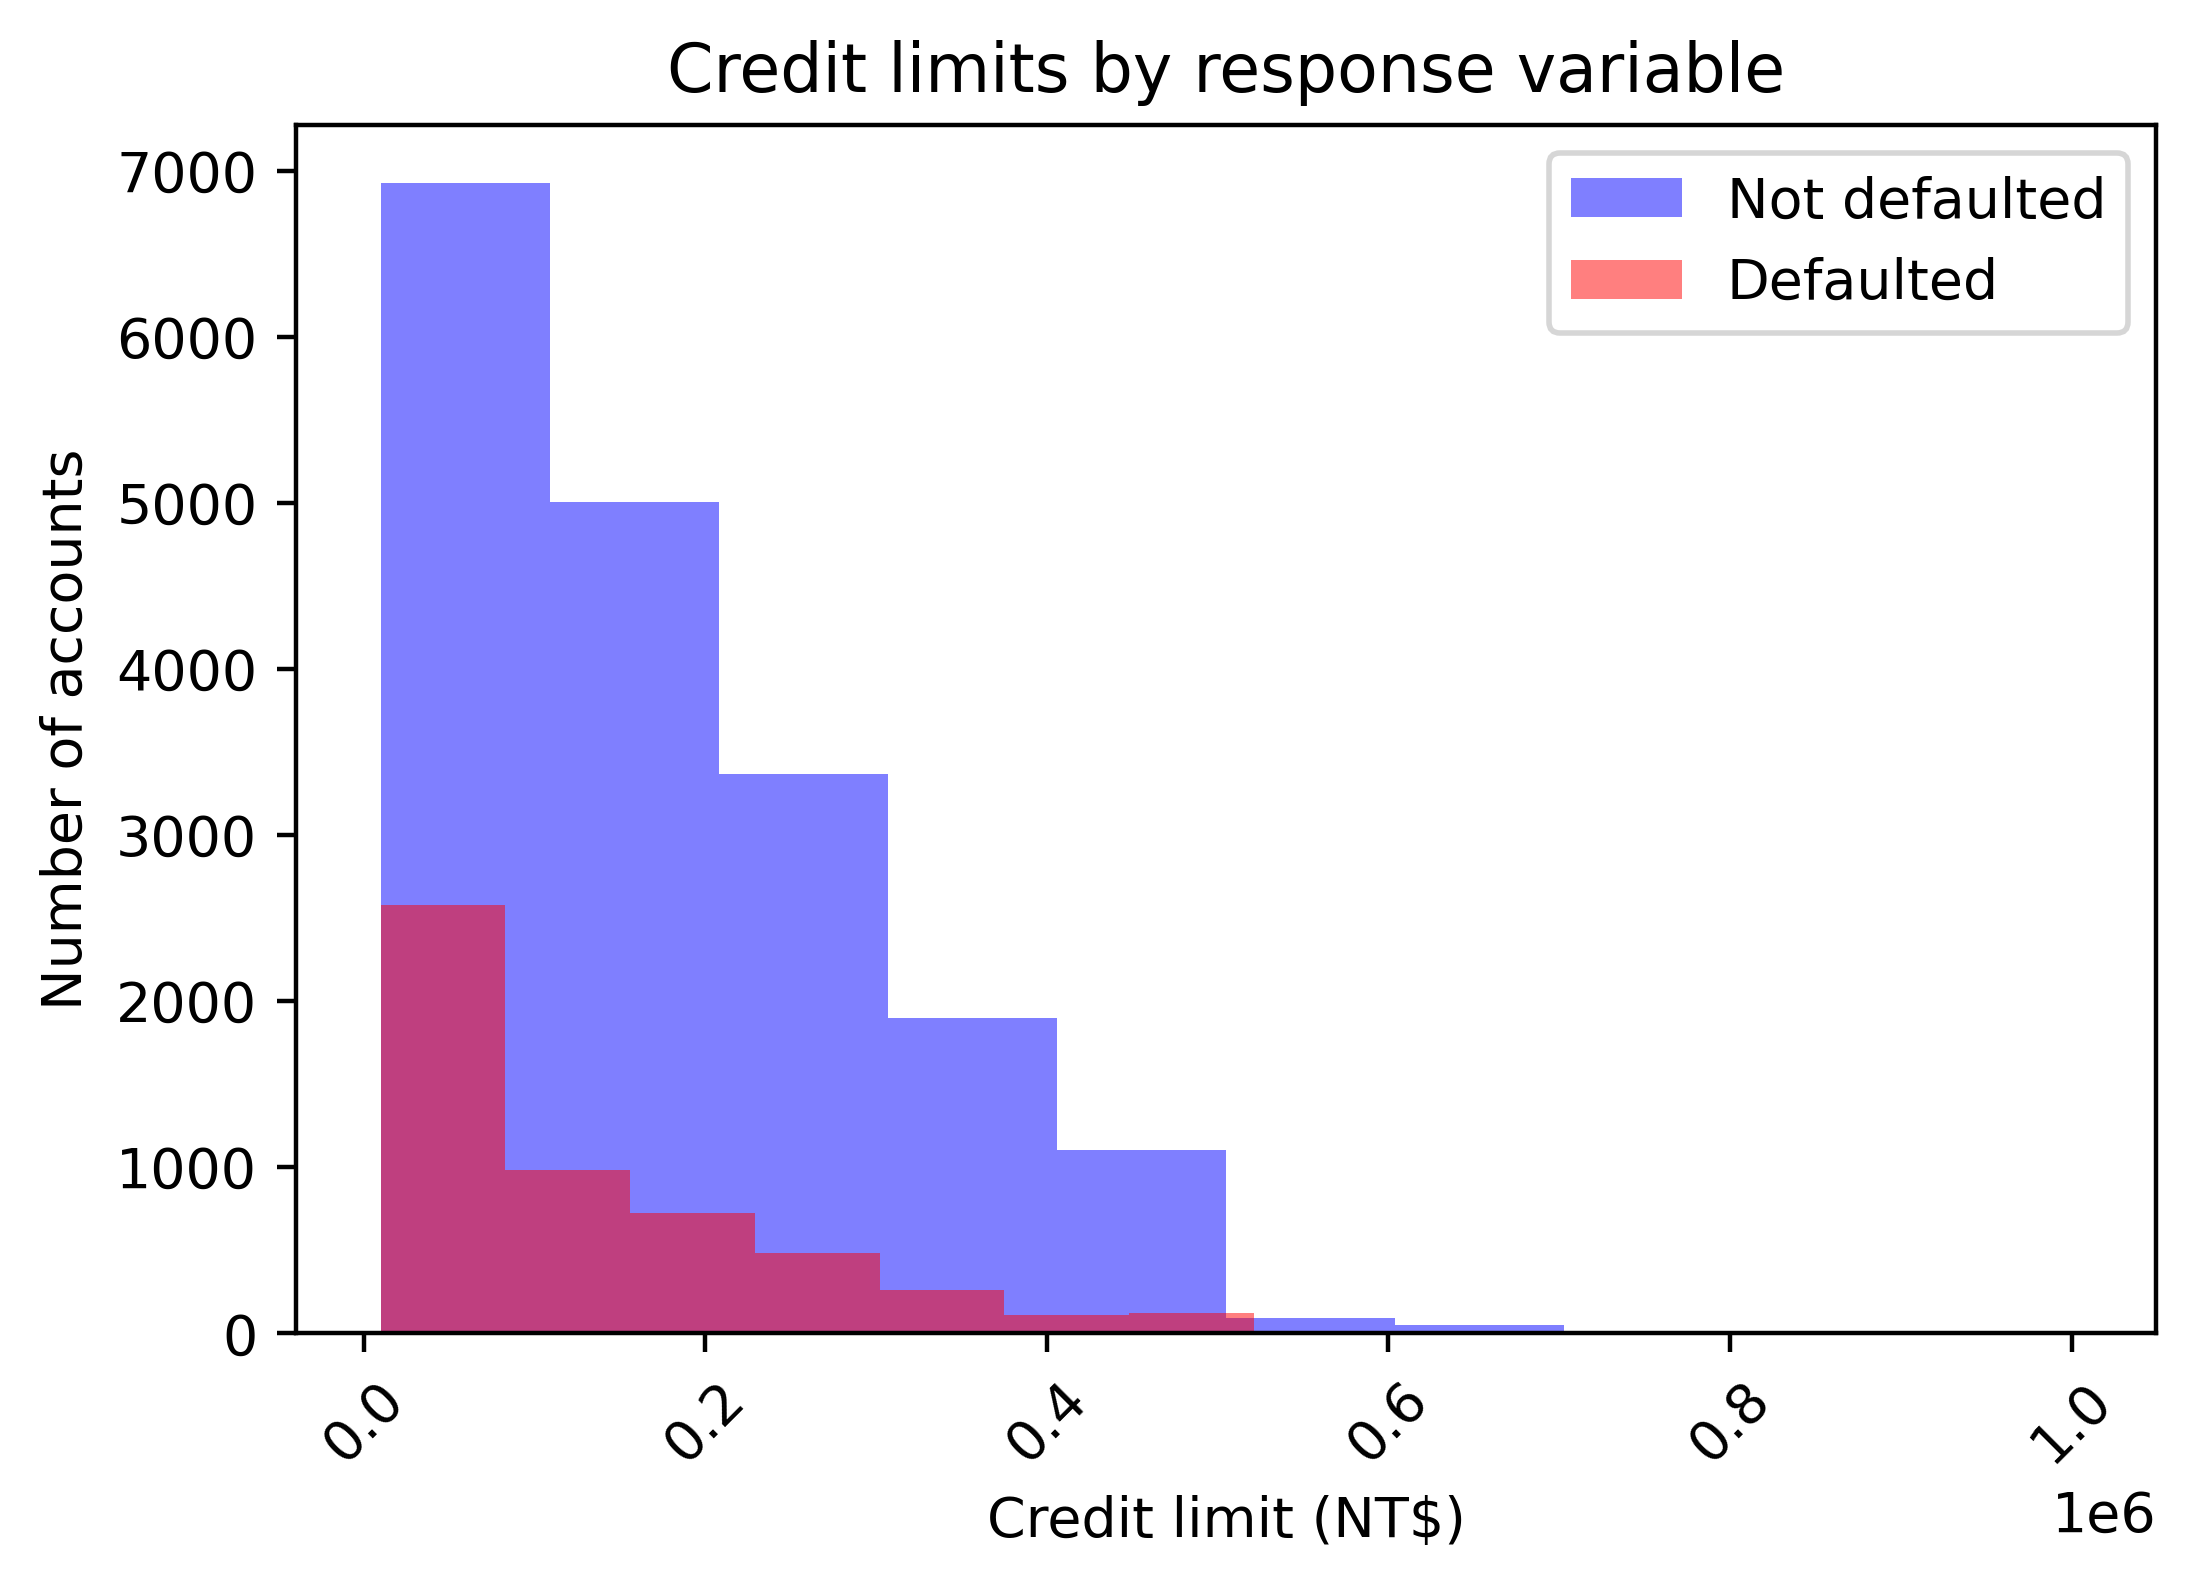

In [101]:
pos_mask = train_data['default payment next month'] == 1
neg_mask = train_data['default payment next month'] == 0
axes = plt.axes()
axes.hist(train_data.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(train_data.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

<ipython-input-103-49200ddd6ec7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

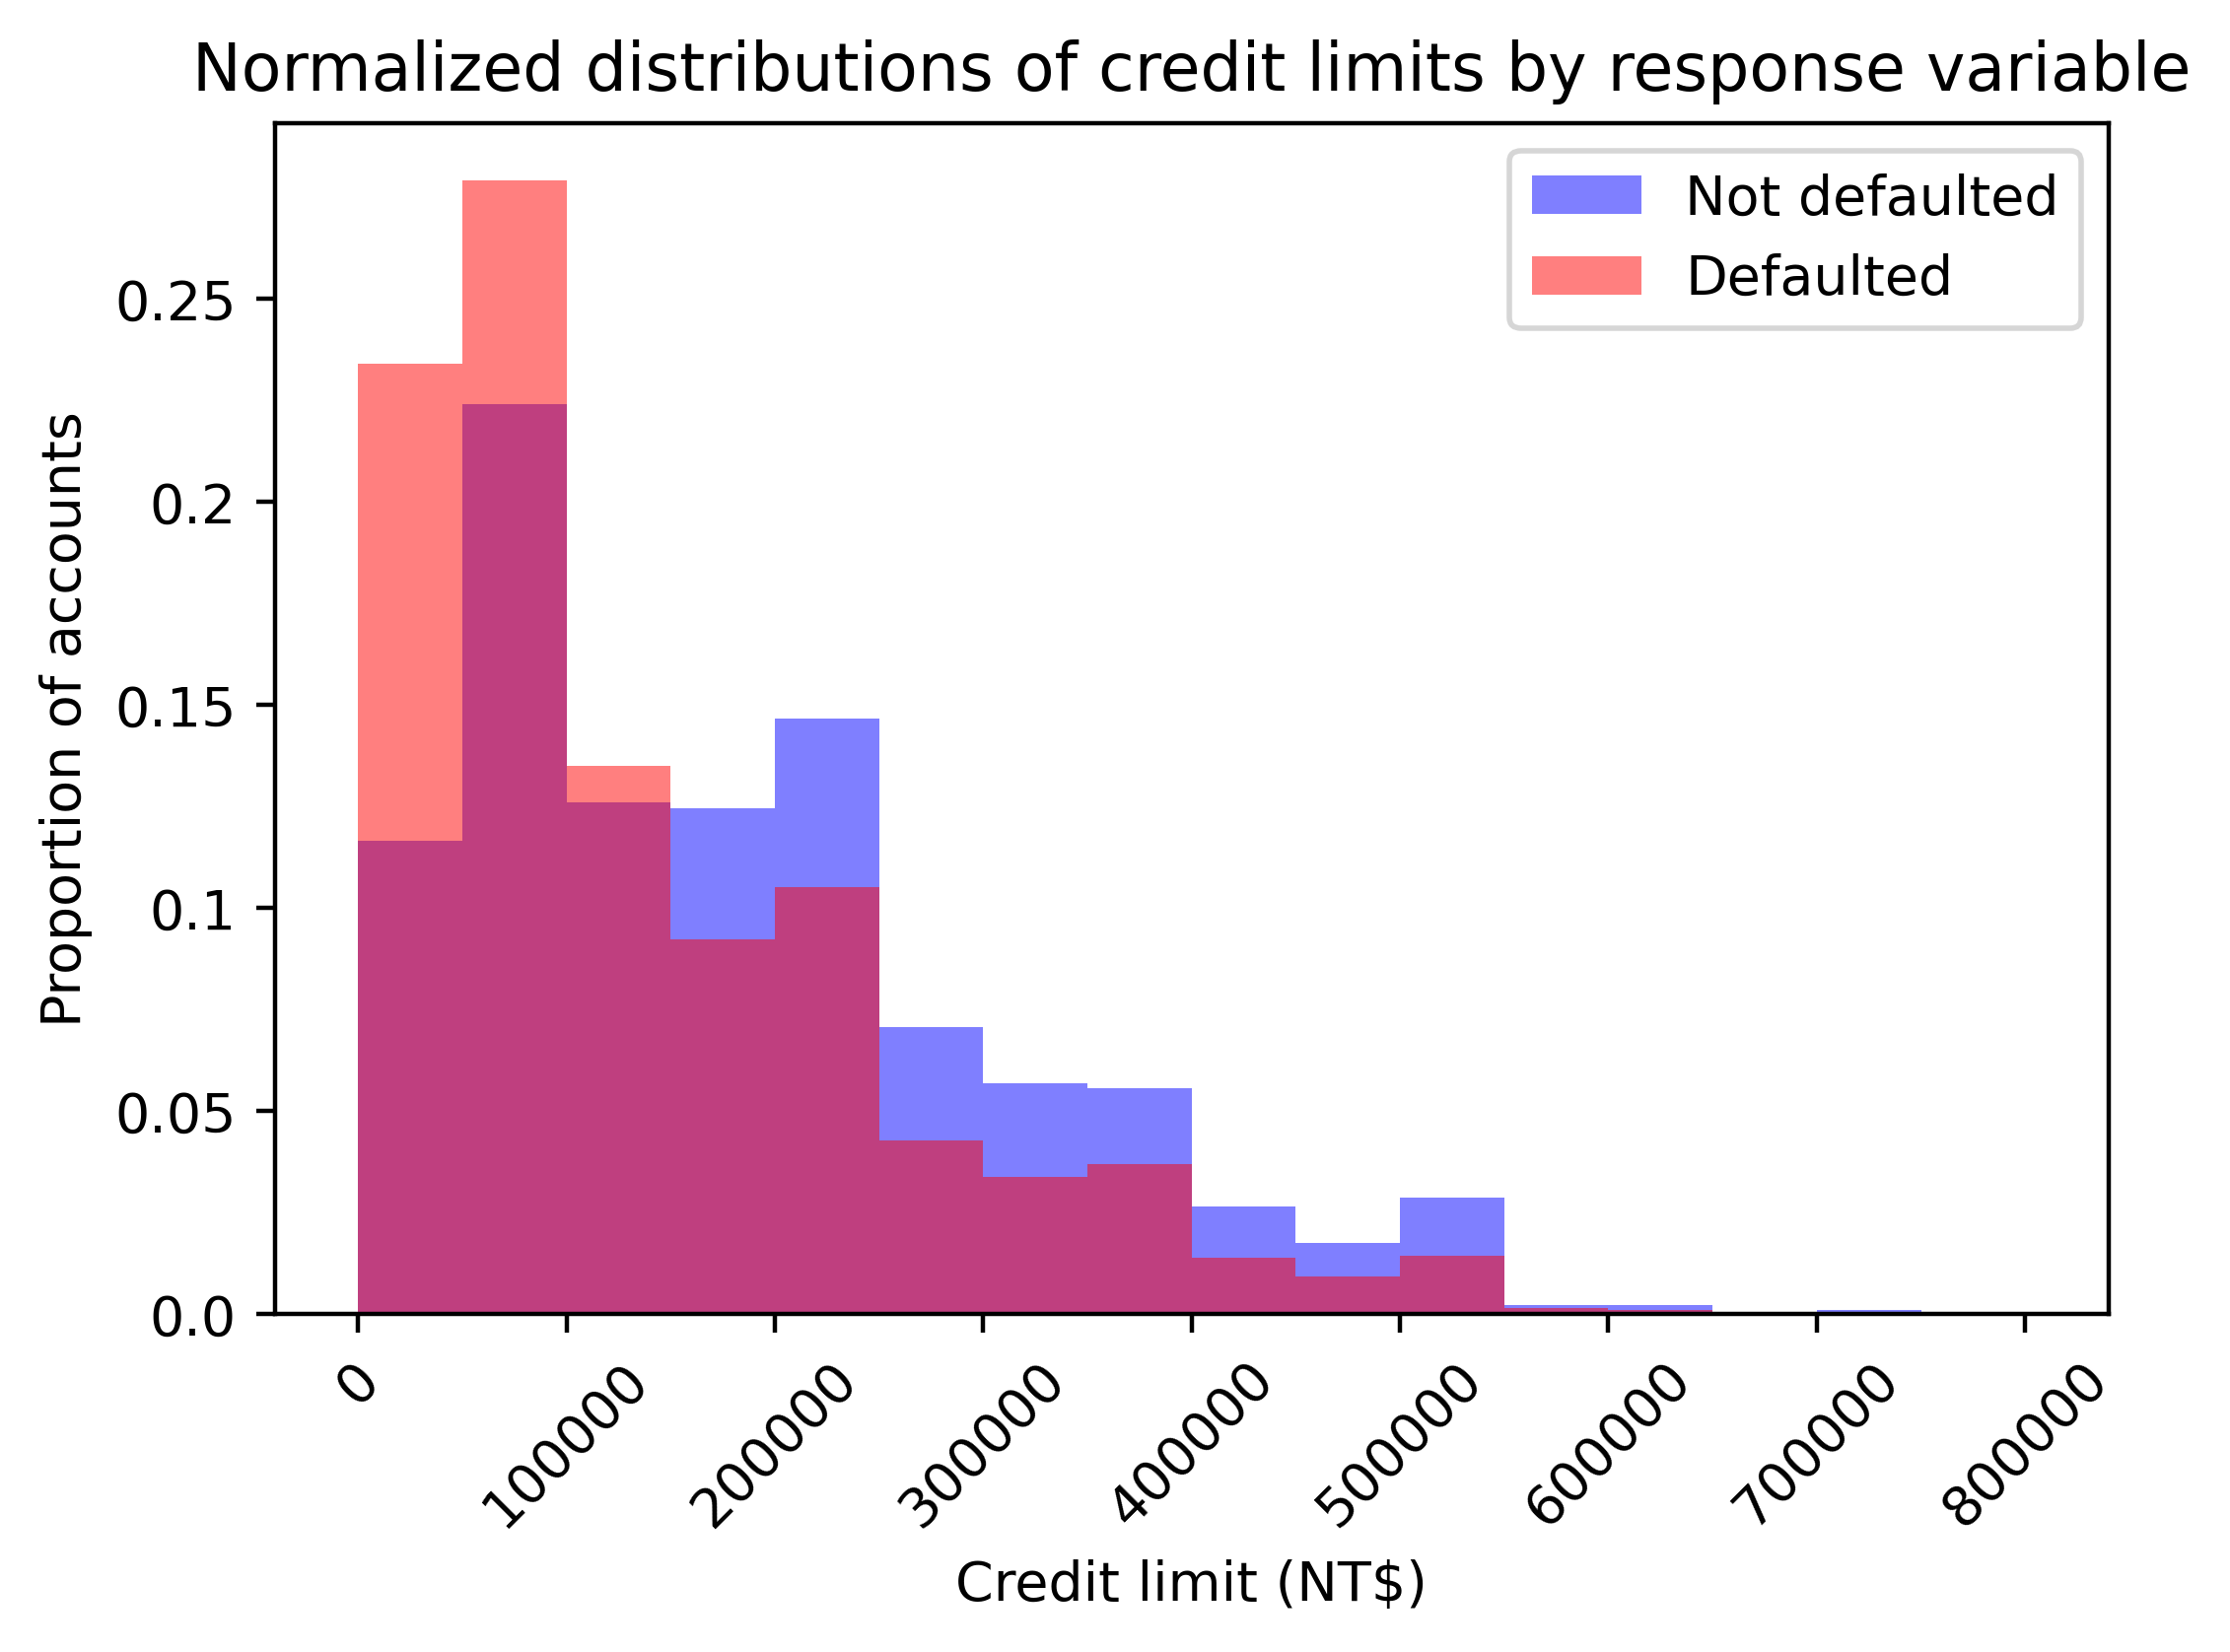

In [103]:
bin_edges = list(range(0,850000,50000))
mpl.rcParams['figure.dpi'] = 400 
axes = plt.axes()
axes.hist(train_data.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(train_data.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Proportion of accounts')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable')